<a href="https://colab.research.google.com/github/amir925/Image_classification_7-3/blob/main/Image_classification_3%267.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''~~~~ written by: Amirmohammad Ahmadi ~~~'''

'~~~~ written by: Amirmohammad Ahmadi ~~~'

In [ ]:
!pip install -Uqq fastbook
import fastbook 
# fastbook.setup_book() N mount GDrive
from fastbook import * 
from matplotlib import pyplot as plt


     |████████████████████████████████| 720 kB 8.8 MB/s 
     |████████████████████████████████| 189 kB 51.5 MB/s 
     |████████████████████████████████| 46 kB 4.0 MB/s 
     |████████████████████████████████| 1.2 MB 41.5 MB/s 
     |████████████████████████████████| 56 kB 4.2 MB/s 
     |████████████████████████████████| 51 kB 136 kB/s 


In [ ]:
path =untar_data(URLs.MNIST_SAMPLE)
path # masiri ke data rikhtim toosh

Path('/root/.fastai/data/mnist_sample')

In [ ]:
(path).ls() # to () ke begzari tamiztar masir ra chap mikone

(#3) [Path('/root/.fastai/data/mnist_sample/labels.csv'),Path('/root/.fastai/data/mnist_sample/train'),Path('/root/.fastai/data/mnist_sample/valid')]

In [ ]:
threes = (path/'train/3').ls().sorted() # niyazi be sort nadare
sevens = (path/'train/7').ls().sorted()

In [ ]:
 sevens

(#6265) [Path('/root/.fastai/data/mnist_sample/train/7/10002.png'),Path('/root/.fastai/data/mnist_sample/train/7/1001.png'),Path('/root/.fastai/data/mnist_sample/train/7/10014.png'),Path('/root/.fastai/data/mnist_sample/train/7/10019.png'),Path('/root/.fastai/data/mnist_sample/train/7/10039.png'),Path('/root/.fastai/data/mnist_sample/train/7/10046.png'),Path('/root/.fastai/data/mnist_sample/train/7/10050.png'),Path('/root/.fastai/data/mnist_sample/train/7/10063.png'),Path('/root/.fastai/data/mnist_sample/train/7/10077.png'),Path('/root/.fastai/data/mnist_sample/train/7/10086.png')...]

In [ ]:
im7_path = sevens[54]

In [ ]:
im7_path

Path('/root/.fastai/data/mnist_sample/train/7/10457.png')

In [ ]:
im7 = Image.open(im7_path)
im7 

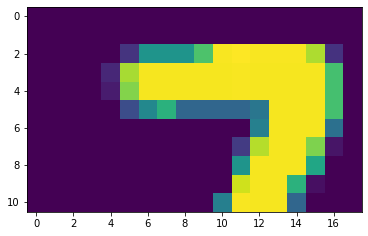

In [ ]:
im7_array = array (im7)
plt.imshow(im7_array) # in pytorch tensor saved in GPU # Imshow get
im7_tensor = tensor(im7)
plt.imshow(im7_tensor[4:15 , 4:22])

In [ ]:
#--- we can also use pandas DF to visualize them in  a neat way: 
df = pd.DataFrame(im7_tensor[4:15, 4:22])
df.style.set_properties(**{'font-size': '6pt'}).background_gradient('BuPu')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,38,132,132,132,184,253,255,253,253,253,224,37,0
3,0,0,0,0,28,222,252,252,252,252,252,253,252,252,252,252,180,0
4,0,0,0,0,19,208,252,252,252,252,252,253,252,252,252,252,180,0
5,0,0,0,0,0,60,119,163,84,84,84,84,100,252,252,252,180,0
6,0,0,0,0,0,0,0,0,0,0,0,0,111,252,252,252,94,0
7,0,0,0,0,0,0,0,0,0,0,0,44,227,252,252,206,14,0
8,0,0,0,0,0,0,0,0,0,0,0,132,252,252,252,151,0,0
9,0,0,0,0,0,0,0,0,0,0,0,237,252,252,164,10,0,0


In [ ]:
#Based Line model # for start Point 
threes_tensors= [tensor(Image.open(f)) for f in threes] # hameye aks haee ke as threes dasktim ra be tensor motanazer tabdil mikonim
# va 1 list azashoon dorost mikonim
seven_tensors = [tensor(Image.open(f)) for f in sevens]

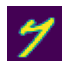

In [ ]:
len(seven_tensors)
seven_tensors[1].shape
show_image(seven_tensors[1])

In [ ]:
stacked_threes = torch.stack(threes_tensors).float() / 255 
# stack all image with size 28*28 and normalized that
stacked_sevens = torch.stack(seven_tensors).float() / 255

In [ ]:
print ( stacked_threes.shape)

torch.Size([6131, 28, 28])


In [ ]:
print(stacked_threes.shape)
a_3 = stacked_threes[34]
a_7 = stacked_sevens[34]
a_7.shape

torch.Size([6131, 28, 28])


torch.Size([28, 28])

(<matplotlib.axes._subplots.AxesSubplot at 0x7f5a52869790>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f5a51fda210>)

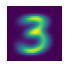

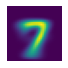

In [ ]:
# we want to compute mean of all image in direction firt dimation 
mean3 = stacked_threes.mean(0)
mean7 = stacked_sevens.mean(0)
show_image(mean3), show_image(mean7)

In [ ]:
#calcute mean squre error
def img_distance (a, b ):
  return ( a - b).abs().mean() 
   # if dont values for argument 
  # compute mean for all tensors
img_distance(a_7, mean7)
img_distance(a_7, mean3)

tensor(0.1541)

In [ ]:
img_distance(a_3, mean7)


tensor(0.1253)

In [ ]:
a_7.size()

In [ ]:
mean7.size()

torch.Size([28, 28])

In [ ]:
# stack all valid sample tensors:
valid_3_tensors = torch.stack([tensor(Image.open(f)) for f in  (path / 'valid/3').ls()])
valid_7_tensors = torch.stack([tensor(Image.open(f)) for f in  (path / 'valid/7').ls()])

# Normalize tensors:
valid_3_tensors = valid_3_tensors.float() / 255
valid_7_tensors = valid_7_tensors.float() / 255

print(valid_3_tensors.shape)

torch.Size([1010, 28, 28])


In [ ]:
def  mnist_distance(input, mean_tensor):
  return (input-mean_tensor).abs().mean((-1,-2))

def is_3(x):
  return (img_distance(x, mean3) < mnist_distance(x,mean7)).float() 
  # if condition True return 1 else return 0
def is_7(x):
  return (img_distance(x, mean7) < mnist_distance(x,mean3)).float() 
  # if condition True return 1 else return 0

In [ ]:
accuracy_3s = is_3 (valid_3_tensors).mean() # 
accuracy_3s

tensor(0.9168)

In [ ]:
accuracy_7s = is_7 (valid_7_tensors).mean() # 
accuracy_7s

tensor(0.9854)